In [1]:
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [2]:
import pandas as pd

In [3]:
df = pd.DataFrame([{'Name':'Ben','AgeGroup':'30-40','CarType':'Family','CrashRisk':'Low'},
                   {'Name':'Paul','AgeGroup':'20-30','CarType':'Sports','CrashRisk':'High'},
                   {'Name':'Bill','AgeGroup':'40-50','CarType':'Sports','CrashRisk':'High'},
                   {'Name':'James','AgeGroup':'30-40','CarType':'Family','CrashRisk':'Low'},
                   {'Name':'John','AgeGroup':'20-30','CarType':'Family','CrashRisk':'High'},
                   {'Name':'Steven','AgeGroup':'30-40','CarType':'Sports','CrashRisk':'High'}
                   ])

In [5]:
df = pd.get_dummies(df, columns=["AgeGroup", "CarType"], prefix=["AG", "CT"])

In [6]:
X = df.drop(['Name','CrashRisk'],axis=1)
y = df['CrashRisk']

In [9]:
clf = DecisionTreeClassifier(random_state=0,criterion='entropy')

In [10]:
model = clf.fit(X, y)

In [11]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_4 <= 0.50
|   |--- feature_0 <= 0.50
|   |   |--- class: Low
|   |--- feature_0 >  0.50
|   |   |--- class: High
|--- feature_4 >  0.50
|   |--- class: High



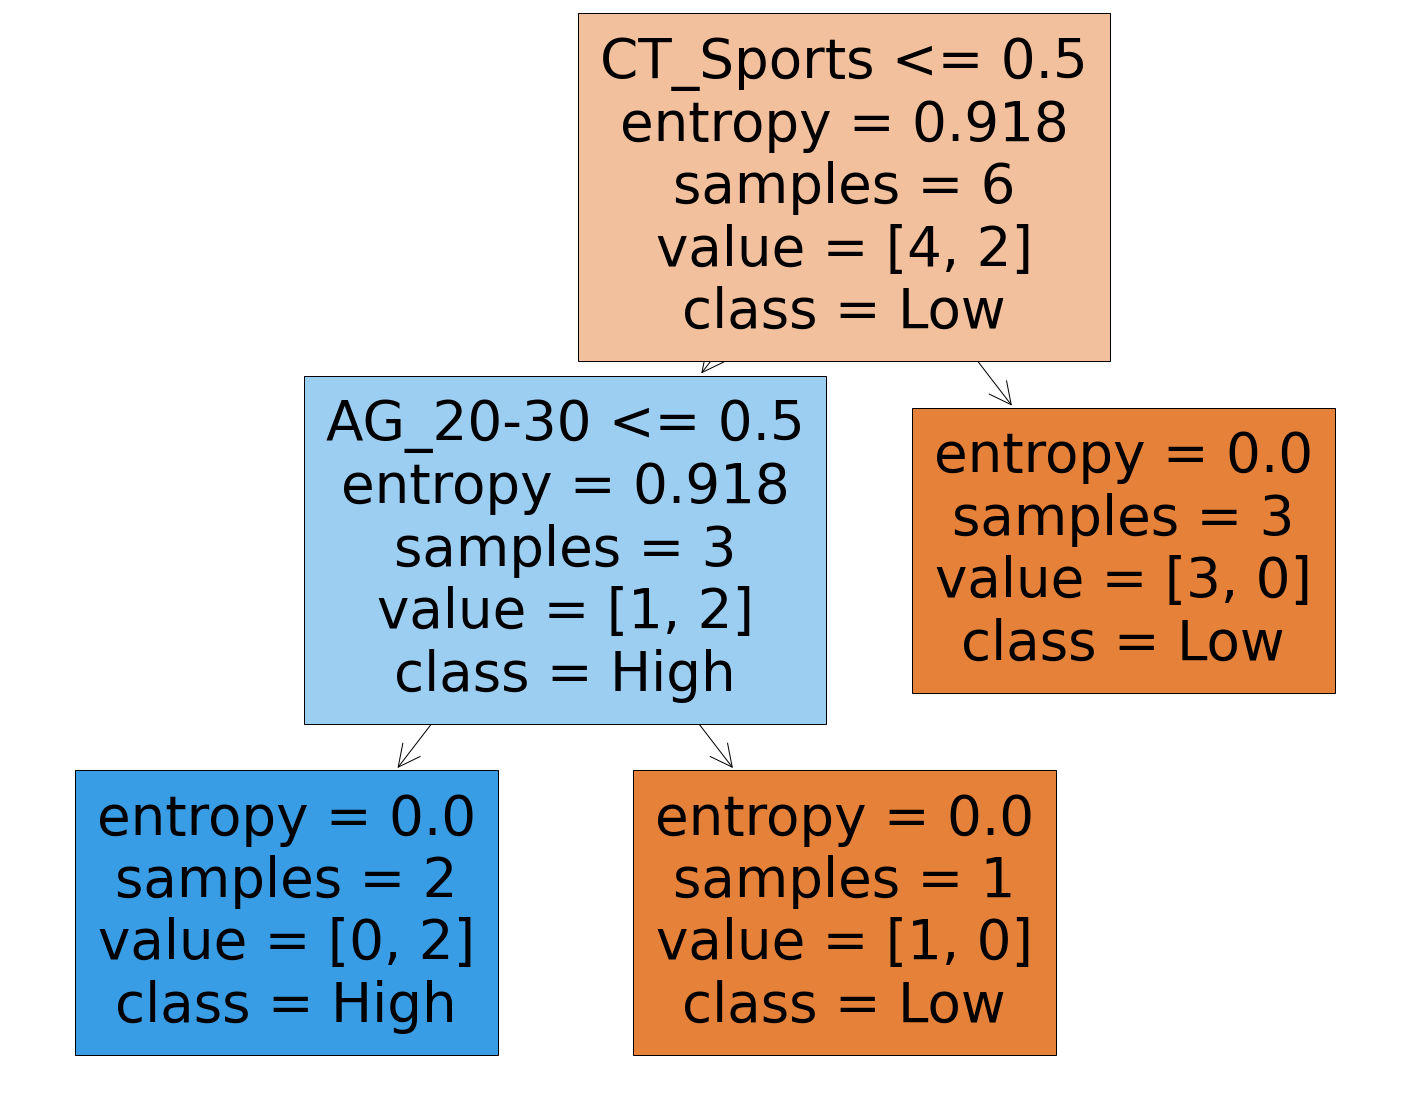

In [12]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=X.columns,  
                   class_names=y,
                   filled=True)

In [13]:
df_predict = pd.DataFrame([{'Name':'Pete', 'AgeGroup':'20-30','CarType':'Sports'},
                           {'Name':'Bob', 'AgeGroup':'40-50','CarType':'Family'}])

In [14]:
df_pred = pd.get_dummies(df_predict, columns=["AgeGroup", "CarType"], prefix=["AG", "CT"])

In [16]:
X_test = df_pred.drop('Name',axis=1)

In [18]:
X

,AG_20-30,AG_30-40,AG_40-50,CT_Family,CT_Sports
0,0,1,0,1,0
1,1,0,0,0,1
2,0,0,1,0,1
3,0,1,0,1,0
4,1,0,0,1,0
5,0,1,0,0,1


In [20]:
X_test['AG_30-40'] = 0

In [21]:
model.predict(X_test)

array(['High', 'Low'], dtype=object)